<a href="https://colab.research.google.com/github/khee11/testrepository/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 1 
tensorflow의 gradient tape 을 사용하여 아래 문제들을 풀어보세요

EX)
```
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
```

### Q1  $y = x^2 + 3x + 1$ 의 수식을  $x$ (a scalar variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  y = tf.square(x) + 3*x + 1
gradient = tape.gradient(y, x)

print("x=",x.numpy(),"일 때 x에 대한 미분값은", gradient.numpy())

x= 3.0 일 때 x에 대한 미분값은 9.0


### Q2 $y = X^3 + 3X + 5$ 의 수식을  $X$ (a 2 by 2 matrix variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
with tf.GradientTape() as tape:
  y = tf.matmul(tf.matmul(x,x),x) + 3*x + 5
gradient = tape.gradient(y, x)

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값은 \n", gradient.numpy())

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값은 
 [[60. 42.]
 [60. 42.]]


### Q3 $z = X^3 y^2 + 3X + 2yX + 1$ 의 수식을  $X$ (a 2 by 2 matrix variable)와 $y$ (a scalar variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
y = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_x = tape.gradient(z, x).numpy()

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_y = tape.gradient(z, y).numpy()

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값 : ", "\n", gradient_x, "\n", "y에 대한 미분값 : \n", gradient_y)

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값 :  
 [[522. 360.]
 [522. 360.]] 
 y에 대한 미분값 : 
 784.0


### 아래 코드는 수업시간에 배운 예제 코드입니다. 코드를 참고하여 문제들을 풀어보세요.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [5]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 45ms/step - loss: 0.5048 - accuracy: 0.7877 - val_loss: 0.3825 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3046 - accuracy: 0.9029 - val_loss: 0.3080 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2241 - accuracy: 0.9258 - val_loss: 0.3060 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1767 - accuracy: 0.9425 - val_loss: 0.2763 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1407 - accuracy: 0.9565 - val_loss: 0.2997 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1186 - accuracy: 0.9631 - val_loss: 0.2950 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0990 - accuracy: 0.9704 - val_loss: 0.3485 - val_accuracy: 0.8688
Epoch 8/20
30

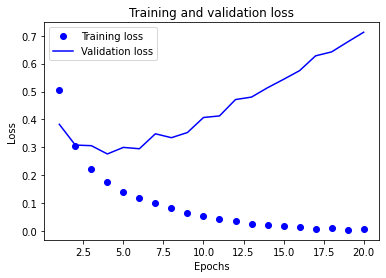

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4695 - accuracy: 0.8154
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2620 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1997 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2958 - accuracy: 0.8822


### Q4 모델에 hidden layer(dense layer)들을 늘려서 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Epoch 1/10
30/30 [==============================] - 2s 50ms/step - loss: 0.5164 - accuracy: 0.7831 - val_loss: 0.3811 - val_accuracy: 0.8704
Epoch 2/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2986 - accuracy: 0.9008 - val_loss: 0.3070 - val_accuracy: 0.8797
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2117 - accuracy: 0.9265 - val_loss: 0.3036 - val_accuracy: 0.8765
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1637 - accuracy: 0.9443 - val_loss: 0.3010 - val_accuracy: 0.8824
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1325 - accuracy: 0.9559 - val_loss: 0.3358 - val_accuracy: 0.8729
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1074 - accuracy: 0.9648 - val_loss: 0.3131 - val_accuracy: 0.8859
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0844 - accuracy: 0.9729 - val_loss: 0.3360 - val_accuracy: 0.8798
Epoch 8/10
30

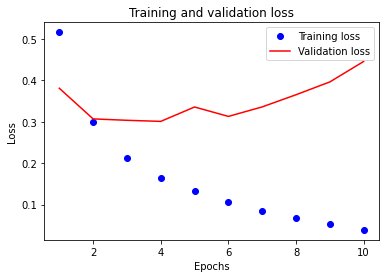

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
# epoch=4일 때 val_loss가 가장 작음

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)
print(results2, "\n loss diff = ", round(results2[0] - results[0], 4), 
      "accuracy diff = ", round(results2[1]-results[1],4))

Epoch 1/4
49/49 [==============================] - 3s 18ms/step - loss: 0.4494 - accuracy: 0.8152
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2496 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1930 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3177 - accuracy: 0.8772
[0.31768402457237244, 0.8771600127220154] 
 loss diff =  0.0218 accuracy diff =  -0.005


Loss는 예제 코드보다 0.0218 증가, accuracy는 0.005 감소

### Q5 Dense layer 들의 output 차원을 16에서 32이로 증가시켜본 후 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

Epoch 1/10
30/30 [==============================] - 2s 40ms/step - loss: 0.4920 - accuracy: 0.7755 - val_loss: 0.4071 - val_accuracy: 0.8298
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 0.2840 - accuracy: 0.8985 - val_loss: 0.2952 - val_accuracy: 0.8827
Epoch 3/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2063 - accuracy: 0.9295 - val_loss: 0.3120 - val_accuracy: 0.8753
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1569 - accuracy: 0.9469 - val_loss: 0.2939 - val_accuracy: 0.8831
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1235 - accuracy: 0.9603 - val_loss: 0.3021 - val_accuracy: 0.8830
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0975 - accuracy: 0.9689 - val_loss: 0.3976 - val_accuracy: 0.8634
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0788 - accuracy: 0.9751 - val_loss: 0.4466 - val_accuracy: 0.8601
Epoch 8/10
30

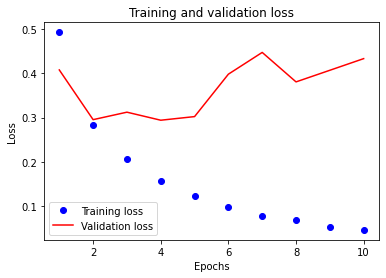

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
# epoch=4일 때 val_loss가 가장 작음

model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model3.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model3.evaluate(x_test, y_test)
print(results3, "\n loss diff = ", round(results3[0] - results[0], 4), 
      "accuracy diff = ", round(results3[1]-results[1],4))

Epoch 1/4
49/49 [==============================] - 3s 23ms/step - loss: 0.4299 - accuracy: 0.8175
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2426 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1895 - accuracy: 0.9300
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3696 - accuracy: 0.8612
[0.3696386218070984, 0.861240029335022] 
 loss diff =  0.0738 accuracy diff =  -0.021


Loss는 예제 코드보다 0.0738 증가, accuracy는 0.021 감소

### Q6 모형을 조금씩 바꿔보면서 성능을 확인해보고, 좋아 보이는 모형하나를 제안해주세요. 

Epoch 1/10
30/30 [==============================] - 2s 41ms/step - loss: 0.5960 - accuracy: 0.7157 - val_loss: 0.4966 - val_accuracy: 0.8296
Epoch 2/10
30/30 [==============================] - 1s 26ms/step - loss: 0.4061 - accuracy: 0.8861 - val_loss: 0.3743 - val_accuracy: 0.8642
Epoch 3/10
30/30 [==============================] - 1s 26ms/step - loss: 0.2751 - accuracy: 0.9235 - val_loss: 0.3348 - val_accuracy: 0.8725
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2065 - accuracy: 0.9373 - val_loss: 0.2881 - val_accuracy: 0.8891
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1605 - accuracy: 0.9534 - val_loss: 0.2968 - val_accuracy: 0.8850
Epoch 6/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1285 - accuracy: 0.9627 - val_loss: 0.3085 - val_accuracy: 0.8842
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1054 - accuracy: 0.9703 - val_loss: 0.3155 - val_accuracy: 0.8849
Epoch 8/10
30

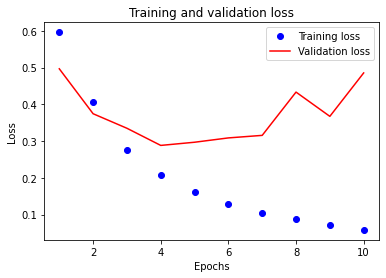

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model4 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"), 
    layers.Dense(8, activation="relu"), 
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history4.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
# epoch=4일 때 val_loss가 가장 작음

from tensorflow import keras
from tensorflow.keras import layers

model4 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"), 
    layers.Dense(8, activation="relu"), 
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model4.fit(x_train, y_train, epochs=4, batch_size=512)
results4 = model4.evaluate(x_test, y_test)
print(results4, "\n loss diff = ", round(results4[0] - results[0], 4), 
      "accuracy diff = ", round(results4[1]-results[1],4))

Epoch 1/4
49/49 [==============================] - 3s 20ms/step - loss: 0.4795 - accuracy: 0.8133
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2666 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2001 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2989 - accuracy: 0.8834
[0.29894697666168213, 0.8833600282669067] 
 loss diff =  0.0031 accuracy diff =  0.0012


Loss는 예제 코드보다 0.0031 증가, accuracy도 0.0012 증가